In [ ]:
import pandas as pd
data = pd.read_csv('smarket.csv')
print(data)

      Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
0     2001  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
1     2001  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2     2001  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
3     2001 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
4     2001  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...    ...    ...    ...    ...    ...    ...      ...    ...       ...
1245  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
1246  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
1247  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
1248  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
1249  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down

[1250 rows x 9 columns]


Correlation matrix is: 
             Lag1      Lag2      Lag3      Lag4      Lag5    Volume     Today
Lag1    1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910 -0.026155
Lag2   -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383 -0.010250
Lag3   -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824 -0.002448
Lag4   -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414 -0.006900
Lag5   -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002 -0.034860
Volume  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000  0.014592
Today  -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592  1.000000


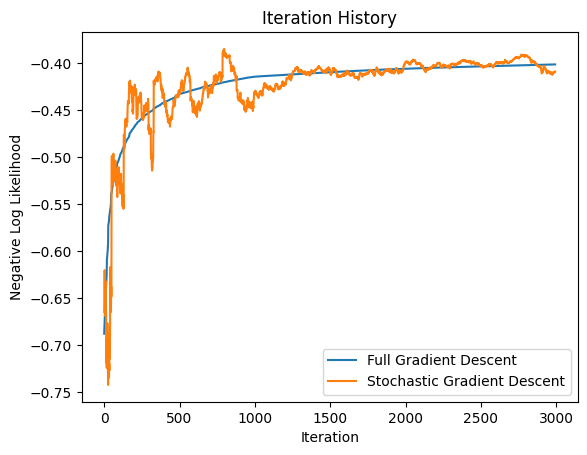

     Actual Direction  Full Gradient Probabilities  Full Gradient Predictions  \
0                   0                     0.012337                          0   
1                   0                     0.001977                          0   
2                   0                     0.132565                          0   
3                   1                     0.880486                          1   
4                   0                     0.321408                          0   
..                ...                          ...                        ...   
247                 1                     0.562005                          1   
248                 0                     0.005604                          0   
249                 1                     0.677527                          1   
250                 0                     0.186567                          0   
251                 0                     0.067077                          0   

     Stochastic Gradient Pr

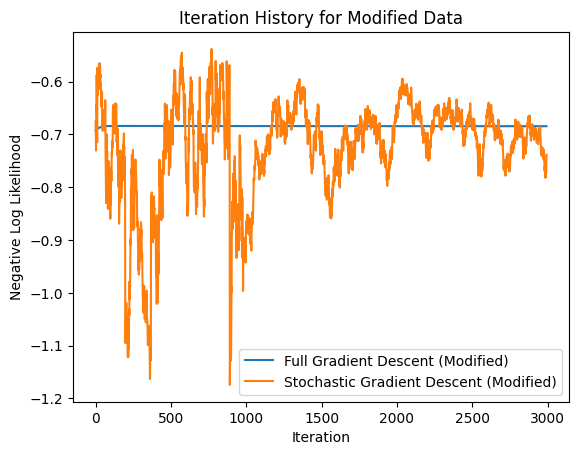

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute the sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to compute the gradient of the negative log likelihood
def fullGradient(w, X, y):
    N = len(y)
    mu = sigmoid(np.dot(X, w))
    return np.dot(X.T, (mu - y)) / N

# Function to compute the stochastic gradient of the negative log likelihood
def randGradient(w, X, y, n):
    mu_n = sigmoid(np.dot(X[n], w))
    return (mu_n - y[n]) * X[n]

# Function to perform gradient descent optimization
def fdescent(X, y, rho, job, nEpoch):
    N, d = X.shape
    w = np.zeros(d)
    f = []
    indices = np.arange(N)
    for epoch in range(nEpoch):
        np.random.shuffle(indices)
        for i in indices:
            if job == 'full':
                gradient = fullGradient(w, X, y)
            elif job == 'stochastic':
                gradient = randGradient(w, X, y, i)
            w -= rho(epoch * N + i + 1) * gradient
            f.append(-np.mean(np.log(1 + np.exp(-y * np.dot(X, w)))))
    return w, f

# Load the data
data = pd.read_csv('smarket.csv')

# Extract relevant columns
X = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']].values
y = (data['Direction'] == 'Up').astype(int).values

# Add bias term
X = np.column_stack((np.ones(len(X)), X))

# Split data into training and test sets
X_train = X[(data['Year'] >= 2001) & (data['Year'] <= 2004)]
y_train = y[(data['Year'] >= 2001) & (data['Year'] <= 2004)]
X_test = X[data['Year'] == 2005]
y_test = y[data['Year'] == 2005]

# Compute correlation matrix
correlation_matrix = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']].corr()
print('Correlation matrix is: \n', correlation_matrix)

# Define learning rate schedule
rho = lambda t: 1 / np.sqrt(t)

# Perform gradient descent for both methods
w_full, f_full = fdescent(X_train, y_train, rho, 'full', 3)
w_stochastic, f_stochastic = fdescent(X_train, y_train, rho, 'stochastic', 3)

# Plot the history of the objective function
plt.plot(f_full, label='Full Gradient Descent')
plt.plot(f_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Negative Log Likelihood')
plt.legend()
plt.title('Iteration History')
plt.show()

# Compute probabilities and predictions for both methods on the test set
probs_full = sigmoid(np.dot(X_test, w_full))
preds_full = (probs_full > 0.5).astype(int)
probs_stochastic = sigmoid(np.dot(X_test, w_stochastic))
preds_stochastic = (probs_stochastic > 0.5).astype(int)

# Create table with predictions and actual directions
results = pd.DataFrame({'Actual Direction': y_test,
                        'Full Gradient Probabilities': probs_full,
                        'Full Gradient Predictions': preds_full,
                        'Stochastic Gradient Probabilities': probs_stochastic,
                        'Stochastic Gradient Predictions': preds_stochastic})
print(results)

# Count misclassified points
misclassified_full = (y_test != preds_full).sum()
misclassified_stochastic = (y_test != preds_stochastic).sum()

print("Misclassified points (Full Gradient Descent):", misclassified_full)
print("Misclassified points (Stochastic Gradient Descent):", misclassified_stochastic)
print('   ')

# Modify data for prediction of the direction of the following day
X_modified = X[:-1]
y_modified = y[1:]  # Shift the y values up by one to predict the next day's direction
print('Modified data of X is: \n ',X_modified)
print('  ')
print('Modified data of y is: \n',y_modified)
print(' ')

# Split modified data into training and test sets
X_train_modified = X_modified[(data['Year'][:-1] >= 2001) & (data['Year'][:-1] <= 2004)]
y_train_modified = y_modified[(data['Year'][:-1] >= 2001) & (data['Year'][:-1] <= 2004)]
X_test_modified = X_modified[data['Year'][:-1] == 2005]
y_test_modified = y_modified[data['Year'][:-1] == 2005]

# Perform gradient descent for both methods on modified data
w_full_modified, f_full_modified = fdescent(X_train_modified, y_train_modified, rho, 'full', 3)
w_stochastic_modified, f_stochastic_modified = fdescent(X_train_modified, y_train_modified, rho, 'stochastic', 3)

# Compute probabilities and predictions for both methods on modified test set
probs_full_modified = sigmoid(np.dot(X_test_modified, w_full_modified))
preds_full_modified = (probs_full_modified > 0.5).astype(int)
probs_stochastic_modified = sigmoid(np.dot(X_test_modified, w_stochastic_modified))
preds_stochastic_modified = (probs_stochastic_modified > 0.5).astype(int)

# Create table with predictions and actual directions for modified data
results_modified = pd.DataFrame({'Actual Direction': y_test_modified,
                                 'Full Gradient Probabilities (Modified)': probs_full_modified,
                                 'Full Gradient Predictions (Modified)': preds_full_modified,
                                 'Stochastic Gradient Probabilities (Modified)': probs_stochastic_modified,
                                 'Stochastic Gradient Predictions (Modified)': preds_stochastic_modified})

print(results_modified)

# Count misclassified points on modified test set
misclassified_full_modified = (y_test_modified != preds_full_modified).sum()
misclassified_stochastic_modified = (y_test_modified != preds_stochastic_modified).sum()

print("Misclassified points (Full Gradient Descent) - Modified data:", misclassified_full_modified)
print("Misclassified points (Stochastic Gradient Descent) - Modified data:", misclassified_stochastic_modified)

# Plot the history of the objective function for modified data
plt.plot(f_full_modified, label='Full Gradient Descent (Modified)')
plt.plot(f_stochastic_modified, label='Stochastic Gradient Descent (Modified)')
plt.xlabel('Iteration')
plt.ylabel('Negative Log Likelihood')
plt.legend()
plt.title('Iteration History for Modified Data')
plt.show()



#Answers for the questions:
1. Correlation matrix shows the correlation coefficients between Lag1, Lag2, Lag3, Lag4, Lag5, and Volume.
   Significant correlations may indicate potential predictive power between variables.

2. Based on the iteration history plot, it appears that the stochastic gradient descent method converges faster
   initially compared to the full gradient descent. However, the full gradient descent eventually catches up and
   converges to a similar objective function value. Both methods achieve comparable results.

3. The table contains probabilities and predictions for both optimization methods on the test set along with the
   actual direction. Misclassified points are counted to evaluate the performance of the classifiers.

4. The misclassified points on both the original and modified datasets are computed to assess the model's
   performance. The misclassification rate gives insights into the predictive power of the logistic regression
   model in predicting the direction of the stock market.